To replicate the sentiment analysis with data from twitter:
A. Start a notebook instance in machine Learning Lab
B. Open the example link and download the source code from Github repository.
C. Sign up for a developer account in Twitter
D. Copy, paste and modify the python code file in the notebook

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect


Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Step 2: Authentication for Twitter API

In [ ]:
# Authentication
consumerKey = "pNKKCSCcEuR6BhczAntLWc5LF"
consumerSecret = "sM9sufybDyspKtLL2nL4jWarfANDqlJNacuprJnmN4Qcxs4Hm2"
accessToken = "1653947609503989763-fHYngBmI1ss2eqeg7wa5gbZGp4QCUu"
accessTokenSecret = "oRAcAHAALhXsT33Zt6YCP5PYlbhWrR4aRgSRAZp6T53Wt"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

Step 3: Getting Tweets With Keyword or Hashtag

In [23]:
#Sentiment Analysis
def percentage(part, whole):
    return 100 * float(part)/float(whole) 


keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:  UCM
Please enter how many tweets to analyze:  200


In [29]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ", len(tweet_list))
print("positive number: ", len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ", len(neutral_list))

total number:  200
positive number:  45
negative number:  33
neutral number:  122


In [30]:
tweet_list[0:20]

,0
0,@Mz_UcM How old is he?
1,RT @SomosComicsLat: Los mejores antagonistas d...
2,"@Kevros765 primeiro filme do ucm q eu vi, tem ..."
3,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
4,"Superman está en muy buenas manos, @JamesGunn ..."
5,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le..."
6,урожая и продУважение к человеку в отношении е...
7,RT @cycymultiverso: 11 años después esta pelíc...
8,RT @peterjordan100: Saiu video do Raluca e a g...
9,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...


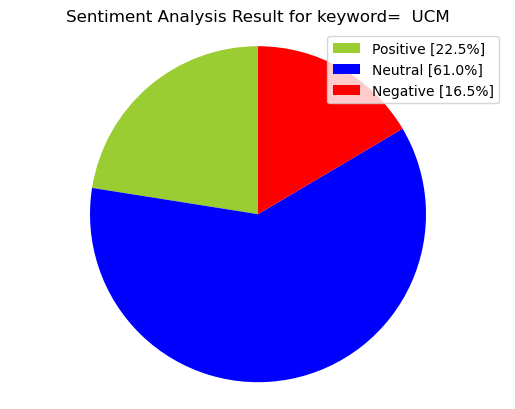

In [31]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]', 'Neutral ['+str(neutral)+'%]', 'Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"")
plt.axis('equal')
plt.show()

In [32]:
tweet_list.drop_duplicates(inplace = True)

Extracting text values

In [33]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,@Mz_UcM How old is he?,@Mz_UcM How old is he?
1,RT @SomosComicsLat: Los mejores antagonistas d...,RT @SomosComicsLat: Los mejores antagonistas d...
2,"@Kevros765 primeiro filme do ucm q eu vi, tem ...","@Kevros765 primeiro filme do ucm q eu vi, tem ..."
3,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
4,"Superman está en muy buenas manos, @JamesGunn ...","Superman está en muy buenas manos, @JamesGunn ..."
...,...,...
179,Choose a fundraiser for MBBL,Choose a fundraiser for MBBL
189,🚨 Tempestade e ciclope serão os protagonistas...,🚨 Tempestade e ciclope serão os protagonistas...
191,Y 4. Extendió el canon del UCM aún paso más al...,Y 4. Extendió el canon del UCM aún paso más al...
193,UCM ta um lixo... https://t.co/TRLfXmmU5o,UCM ta um lixo... https://t.co/TRLfXmmU5o


In [36]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@Mz_UcM How old is he?,ucm how old is he
1,RT @SomosComicsLat: Los mejores antagonistas d...,los mejores antagonistas del ucm guardians...
2,"@Kevros765 primeiro filme do ucm q eu vi, tem ...",primeiro filme do ucm q eu vi tem um cantin...
3,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...
4,"Superman está en muy buenas manos, @JamesGunn ...",superman est en muy buenas manos acabas de...
5,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...",del 1 al 10 qu notan le ponen a guard...
6,урожая и продУважение к человеку в отношении е...,...
7,RT @cycymultiverso: 11 años después esta pelíc...,11 a os despu s esta pel cula sigue siendo un...
8,RT @peterjordan100: Saiu video do Raluca e a g...,saiu video do raluca e a galera ta mais hypad...
11,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...


In [37]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_4390/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@Mz_UcM How old is he?,ucm how old is he,0.1,0.200000,neutral,0.000,1.000,0.000,0.0000
1,RT @SomosComicsLat: Los mejores antagonistas d...,los mejores antagonistas del ucm guardians...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
2,"@Kevros765 primeiro filme do ucm q eu vi, tem ...",primeiro filme do ucm q eu vi tem um cantin...,0.0,0.000000,negative,0.167,0.833,0.000,-0.2960
3,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...,0.0,0.066667,negative,0.165,0.688,0.147,-0.1027
4,"Superman está en muy buenas manos, @JamesGunn ...",superman est en muy buenas manos acabas de...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
5,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...",del 1 al 10 qu notan le ponen a guard...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
6,урожая и продУважение к человеку в отношении е...,...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
7,RT @cycymultiverso: 11 años después esta pelíc...,11 a os despu s esta pel cula sigue siendo un...,0.0,0.000000,positive,0.097,0.796,0.106,0.0516
8,RT @peterjordan100: Saiu video do Raluca e a g...,saiu video do raluca e a galera ta mais hypad...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
11,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000


In [38]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [15]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:, feature].value_counts(dropna=False)
    percentage=round(data.loc[:, feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total, percentage],axis=1,keys=['Total','Percentage'])

In [16]:
#Count_values for sentiment
count_values_in_column(tw_list, "sentiment")

,Total,Percentage
neutral,48,60.00
positive,17,21.25
negative,15,18.75


In [ ]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [18]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()

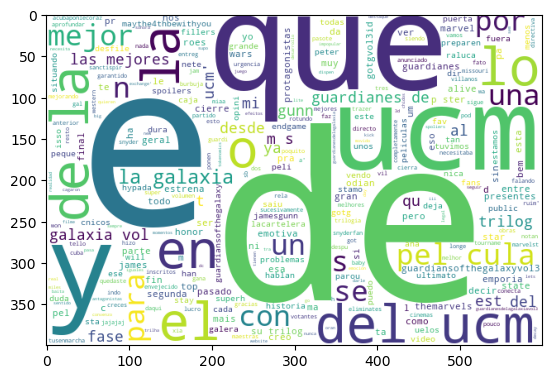

In [19]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

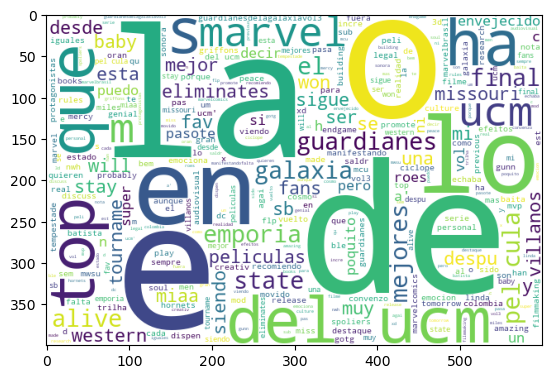

In [20]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

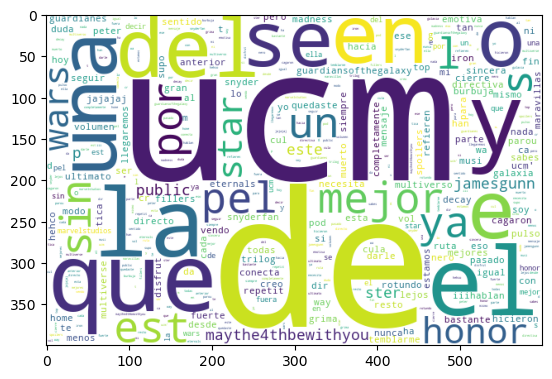

In [21]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

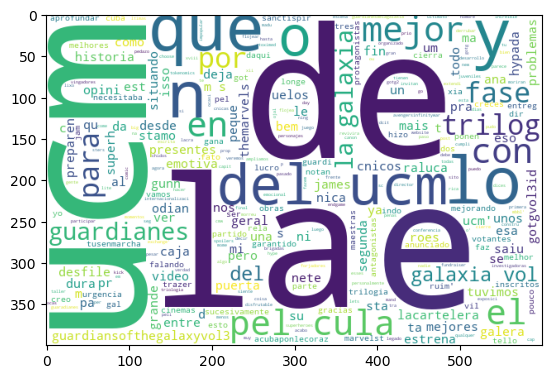

In [22]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)